<a href="https://colab.research.google.com/github/joaop-n12/Machine_Learning/blob/main/revis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/content/uboats.csv')
df.head(1)

,Name,Year,Type,Notable Commanders,Warships_sunk_n_total_loss_No,Warships_sunk_n_total_loss_Tons-n-GRT,Warships_Damaged_No,Warships_Damaged_Tons-n-GRT,Merchant_Ships_sunk_No,Merchant_Ships_sunk_GRT,...,Notes,URL,Commissioned,Patrols,Patrols_Count,Wolfpacks,Wolfpacks_Count,Flotilla,Flotilla_Count,Last_Flotilla
0,U-1,1935,IIA,Klaus Ewerth,0,0,0,0,0,0,...,Struck a mine,https://en.wikipedia.org/wiki/German_submarine...,1935-06-29,2 patrols:1st patrol:15 – 29 March 19402nd pat...,2,NaN,0,"{'U-boat School Flotilla': ['1 July 1935 ', ' ...",1,U-boat School Flotilla


In [ ]:
import math
total_commanders = []
for commanders in df['Notable Commanders']:
  if commanders and type(commanders) == str:
    total_commanders = total_commanders + commanders.split(',')
c = pd.Series(total_commanders).value_counts()
print(c)

Klaus Ewerth          5
Karl-Heinz Marbach    5
Wolfgang Lüth         5
Adalbert Schnee       5
Erich Topp            4
                     ..
Jürgen Wattenberg     1
August Maus           1
Siegfried Lüdden      1
Reinhart Reche        1
Kurt Dobratz          1
Name: count, Length: 149, dtype: int64


In [ ]:
df['Klaus Ewerth'] = df.apply(lambda row: 1 if type(row['Notable Commanders']) == str and 'Klaus Ewerth' in row['Notable Commanders'] else 0, axis=1)
df['Karl-Heinz Marbach'] = df.apply(lambda row: 1 if type(row['Notable Commanders']) == str and 'Karl-Heinz Marbach' in row['Notable Commanders'] else 0, axis=1)
df['Wolfgang Lüth'] = df.apply(lambda row: 1 if type(row['Notable Commanders']) == str and 'Wolfgang Lüth' in row['Notable Commanders'] else 0, axis=1)
df['Adalbert Schnee'] = df.apply(lambda row: 1 if type(row['Notable Commanders']) == str and 'Adalbert Schnee' in row['Notable Commanders'] else 0, axis=1)

print(df['Klaus Ewerth'].value_counts())
print(df['Karl-Heinz Marbach'].value_counts())
print(df['Wolfgang Lüth'].value_counts())
print(df['Adalbert Schnee'].value_counts())

Klaus Ewerth
0    1148
1       5
Name: count, dtype: int64
Karl-Heinz Marbach
0    1148
1       5
Name: count, dtype: int64
Wolfgang Lüth
0    1148
1       5
Name: count, dtype: int64
Adalbert Schnee
0    1148
1       5
Name: count, dtype: int64


In [ ]:
df['Type'].value_counts().head(5)

,count
Type,
VIIC,568
XXI,118
VIIC/41,91
IXC/40,87
XXIII,61


In [ ]:
df['VIIC'] = df.apply(lambda row: 1 if row['Type'] == 'VIIC' else 0, axis=1)
df['XXI'] = df.apply(lambda row: 1 if row['Type'] == 'XXI' else 0, axis=1)
df['VIIC/41'] = df.apply(lambda row: 1 if row['Type'] == 'VIIC/41' else 0, axis=1)
df['IXC/40'] = df.apply(lambda row: 1 if row['Type'] == 'IXC/40' else 0, axis=1)
df['XXIII'] = df.apply(lambda row: 1 if row['Type'] == 'XXIII' else 0, axis=1)
df['type_other'] = df.apply(lambda row: 1 if row['Type'] not in ['VIIC','XXI','VIIC/41','IXC/40','XXIII'] else 0, axis=1)
print(df['VIIC'].value_counts())
print(df['XXI'].value_counts())
print(df['VIIC/41'].value_counts())
print(df['IXC/40'].value_counts())
print(df['XXIII'].value_counts())
print(df['type_other'].value_counts())


VIIC
0    585
1    568
Name: count, dtype: int64
XXI
0    1035
1     118
Name: count, dtype: int64
VIIC/41
0    1062
1      91
Name: count, dtype: int64
IXC/40
0    1066
1      87
Name: count, dtype: int64
XXIII
0    1092
1      61
Name: count, dtype: int64
type_other
0    925
1    228
Name: count, dtype: int64


In [ ]:
df.head(2)

,Name,Year,Type,Notable Commanders,Warships_sunk_n_total_loss_No,Warships_sunk_n_total_loss_Tons-n-GRT,Warships_Damaged_No,Warships_Damaged_Tons-n-GRT,Merchant_Ships_sunk_No,Merchant_Ships_sunk_GRT,...,Klaus Ewerth,Karl-Heinz Marbach,Wolfgang Lüth,Adalbert Schnee,VIIC,XXI,VIIC/41,IXC/40,XXIII,type_other
0,U-1,1935,IIA,Klaus Ewerth,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,U-2,1935,IIA,"Hans Heidtmann,Heinrich Liebe,Helmut Rosenbaum...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['Fate_Event'].value_counts().head(5)

,count
Fate_Event,
Sunk,650
Scuttled,268
Surrendered,149
Missing,45
Stricken,15


In [ ]:
df['Fate_Class'] = 'undefined'
df['Fate_Class'] = df.apply(lambda row: 1 if row['Fate_Event'] == 'Sunk' else row['Fate_Class'], axis=1)
df['Fate_Class'] = df.apply(lambda row: 2 if row['Fate_Event'] == 'Scuttled' else row['Fate_Class'], axis=1)
df['Fate_Class'] = df.apply(lambda row: 3 if row['Fate_Event'] == 'Surrendered' else row['Fate_Class'], axis=1)
df['Fate_Class'] = df.apply(lambda row: 4 if row['Fate_Event'] == 'Missing' else row['Fate_Class'], axis=1)
df['Fate_Class'] = df.apply(lambda row: 0 if type(row['Fate_Class']) == str else row['Fate_Class'], axis=1)
df['Fate_Class'].value_counts()

,count
Fate_Class,
1,650
2,268
3,149
4,45
0,41


In [ ]:
df1 = df.copy()
df1.drop(['Type', 'Fate_Date', 'Fate_Event', 'Name', 'Notable Commanders', 'Last_Flotilla', 'Flotilla', 'Wolfpacks', 'Patrols', 'Notes','URL', 'Commissioned'], axis='columns', inplace=True)
df1.head(2)

,Year,Warships_sunk_n_total_loss_No,Warships_sunk_n_total_loss_Tons-n-GRT,Warships_Damaged_No,Warships_Damaged_Tons-n-GRT,Merchant_Ships_sunk_No,Merchant_Ships_sunk_GRT,Merchant_Ships_damaged_No,Merchant_Ships_damaged_GRT,Merchant_Ships_total_loss_No,...,Karl-Heinz Marbach,Wolfgang Lüth,Adalbert Schnee,VIIC,XXI,VIIC/41,IXC/40,XXIII,type_other,Fate_Class
0,1935,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1935,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df1['Merchant_Ships_damaged_GRT'].value_counts()

,count
Merchant_Ships_damaged_GRT,
0,953
"7,176",6
"7,134",4
"3,670",2
"8,022",2
...,...
"15,771",1
"18,811",1
"15,264",1


In [ ]:
df1['Warships_sunk_n_total_loss_Tons-n-GRT'] = pd.to_numeric(df1['Warships_sunk_n_total_loss_Tons-n-GRT'], errors='coerce')
df1['Warships_Damaged_Tons-n-GRT'] = pd.to_numeric(df1['Warships_Damaged_Tons-n-GRT'], errors='coerce')
df1['Merchant_Ships_sunk_GRT'] = pd.to_numeric(df1['Merchant_Ships_sunk_GRT'], errors='coerce')
df1['Merchant_Ships_damaged_GRT'] = pd.to_numeric(df1['Merchant_Ships_damaged_GRT'], errors='coerce')
df1['Merchant_Ships_total_loss_GRT'] = pd.to_numeric(df1['Merchant_Ships_total_loss_GRT'], errors='coerce')
df1.dtypes

,0
Year,int64
Warships_sunk_n_total_loss_No,int64
Warships_sunk_n_total_loss_Tons-n-GRT,float64
Warships_Damaged_No,int64
Warships_Damaged_Tons-n-GRT,float64
Merchant_Ships_sunk_No,int64
Merchant_Ships_sunk_GRT,float64
Merchant_Ships_damaged_No,int64
Merchant_Ships_damaged_GRT,float64
Merchant_Ships_total_loss_No,int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6264705882352941


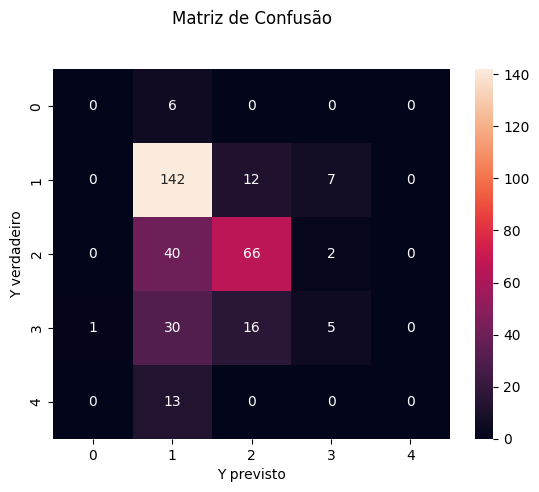

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

def reglog_train_evaluate(df, features, target):
  df = df.dropna(subset=features)
  df = df.dropna(subset=target)
  x = df[features]
  y = df[target]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

  model = LogisticRegression(max_iter=3000)
  model.fit(x_train, y_train)

  y_predicted = model.predict(x_test)
  print(accuracy_score(y_test, y_predicted))

  matriz_confusao = confusion_matrix(y_test, y_predicted)
  sns.heatmap(pd.DataFrame(matriz_confusao), annot=True, fmt='g')
  plt.title("Matriz de Confusão", y=1.1)
  plt.ylabel("Y verdadeiro")
  plt.xlabel("Y previsto")

features = df1.columns.to_list()
features.remove('Fate_Class')
target = 'Fate_Class'
reglog_train_evaluate(df1, features, target)

In [ ]:
df1['Fate_Class'].value_counts()

,count
Fate_Class,
1,650
2,268
3,149
4,45
0,41


205
0.375


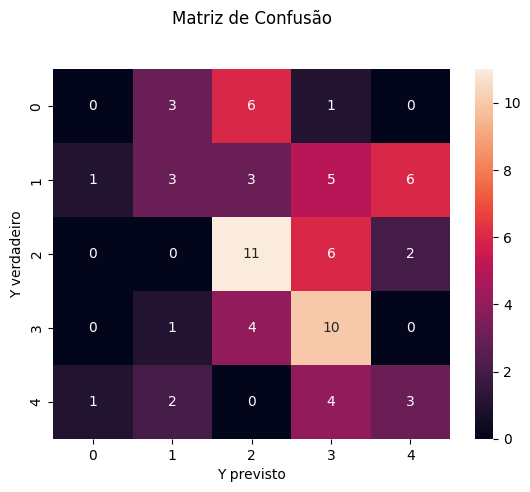

In [ ]:
df1_0 = df1[df1['Fate_Class'] == 0]
df1_1 = df1[df1['Fate_Class'] == 1].sample(41)
df1_2 = df1[df1['Fate_Class'] == 2].sample(41)
df1_3 = df1[df1['Fate_Class'] == 3].sample(41)
df1_4 = df1[df1['Fate_Class'] == 4].sample(41)

df2 = pd.concat([df1_0, df1_1, df1_2, df1_3, df1_4])
print(len(df2))

features = df2.columns.to_list()
features.remove('Fate_Class')
target = 'Fate_Class'
reglog_train_evaluate(df2, features, target)

Accuracy: 0.3333


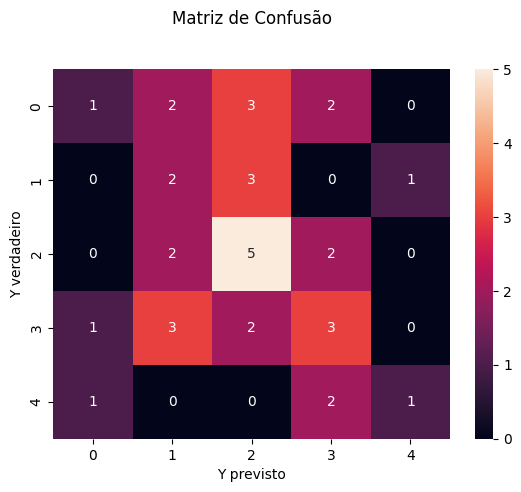

In [ ]:
def mlpclassifier_train_evaluate(df, features, target):
  df = df.dropna(subset=features)
  df = df.dropna(subset=target)
  x = df[features]
  y = df[target]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

  ss = StandardScaler()
  x_train_scaled = ss.fit_transform(x_train)
  x_test_scaled = ss.transform(x_test)

  model = MLPClassifier(hidden_layer_sizes=(20,20,20,20,10,8),
                          max_iter = 5000,
                          alpha = 0.001,
                          solver = 'adam',
                          learning_rate = 'adaptive')
  model.fit(x_train_scaled, y_train)

  y_pred = model.predict(x_test_scaled)
  print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))

  matriz_confusao = confusion_matrix(y_test, y_pred)
  sns.heatmap(pd.DataFrame(matriz_confusao), annot=True, fmt='g')
  plt.title("Matriz de Confusão", y=1.1)
  plt.ylabel("Y verdadeiro")
  plt.xlabel("Y previsto")

features = df2.columns.to_list()
features.remove('Fate_Class')
target = 'Fate_Class'
mlpclassifier_train_evaluate(df2, features, target)

regresseor é relu
tanh e tanl
se tem um modelo muito pesado, ele vai treinar mto e vai dar overfitting, e por isso que a performace cai bastante